### FAKE NEWS CLASSIFICATION USING NLP

#### Input: https://www.kaggle.com/c/fake-news/data#

1 -> Fake

0 -> Real

In [1]:
# import statements

import pandas as pd
import numpy as np
import itertools
import re
import string
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier

from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')

### I. Data Loading

In [2]:
# loading the train data in dataframe
path = r'fake-news/train.csv'
news_data = pd.read_csv(path)
news_data.head(5)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


### II. Initial Analysis

In [3]:
# checking the structure of the data
news_data.shape

(20800, 5)

In [4]:
# checking for null values
news_data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [5]:
# checking for balanced data
news_data.label.value_counts()

1    10413
0    10387
Name: label, dtype: int64

### III. Data Cleaning

In [6]:
# dropping all NaN records
news_data = news_data.dropna()

# resetting the index after dropping any records
news_data.reset_index(inplace=True)

print(news_data.index)

RangeIndex(start=0, stop=18285, step=1)


In [7]:
lemmatizer = WordNetLemmatizer()
corpus = []

# iterating over all records
for row in range(len(news_data)):
    # replacing all non-alpha characters by space
    news_data['title'][row] = re.sub('[^a-zA-Z]', ' ',news_data['title'][row])
    
    # normalizing the text
    news_data['title'][row] = news_data['title'][row].lower()
         
    # tokenisation
    words = news_data['title'][row].split()
    
    # lemmatization once stopwords are removed
    words = [lemmatizer.lemmatize(word) for word in words if not word in stopwords.words('english')]
    
    # join back to form sentence
    news_data['title'][row] = ' '.join(words)  

    # appending the text to corpus for Bag of Words
    corpus.append(news_data['title'][row])

### IV. Bag of Words

In [8]:
cv = CountVectorizer(max_features=5000, ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()
y = news_data['label']


'''
tf_idf = TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X= tf_idf.fit_transform(corpus).toarray())
y = news_data['label']
'''

"\ntf_idf = TfidfVectorizer(max_features=5000,ngram_range=(1,3))\nX= tf_idf.fit_transform(corpus).toarray())\ny = news_data['label']\n"

In [9]:
X.shape

(18285, 5000)

In [10]:
cv.get_feature_names()[:10]

['abandon',
 'abandoned',
 'abc',
 'abc news',
 'abe',
 'abedin',
 'able',
 'abortion',
 'abroad',
 'absolutely']

In [11]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

### V. Train Test Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)

### Confusion Matrix Plot

In [13]:
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

### MultiNomial Naive Bayes Algorithm

Accuracy: 0.900
Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      2076
           1       0.87      0.91      0.89      1581

    accuracy                           0.90      3657
   macro avg       0.90      0.90      0.90      3657
weighted avg       0.90      0.90      0.90      3657



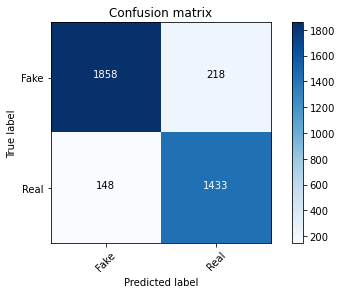

In [14]:
classifier = MultinomialNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
print('Accuracy: %0.3f' % acc_score)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm,classes=['Fake', 'Real'] )
print(classification_report(y_test, y_pred))

### Passive Agressive Classifier

Passive Aggressive algorithms are online learning algorithms, remains passive for a correct classification outcome, and turns aggressive in case of a misclassification, hence updating and adjusting. 

Unlike other algorithms, it does not converge. Its purpose is to make updates that correct the loss, causing very little change in the norm of the weight vector.

Accuracy: 0.911
Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      2076
           1       0.89      0.90      0.90      1581

    accuracy                           0.91      3657
   macro avg       0.91      0.91      0.91      3657
weighted avg       0.91      0.91      0.91      3657



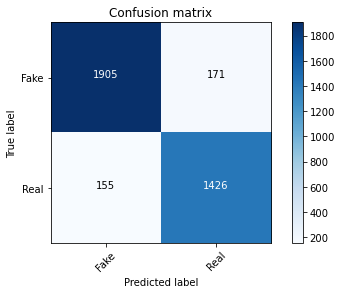

In [15]:
classifier_passive = PassiveAggressiveClassifier(n_iter_no_change=100)
classifier_passive.fit(X_train, y_train)
y_pred_ = classifier_passive.predict(X_test)

acc_score = accuracy_score(y_test, y_pred_)
print('Accuracy: %0.3f' % acc_score)

cm = confusion_matrix(y_test, y_pred_)
plot_confusion_matrix(cm,classes=['Fake', 'Real'] )
print(classification_report(y_test, y_pred_))

### HyperParameter Tuning

In [16]:
classifier = MultinomialNB(alpha=0.1)
prev_score=0

for alpha in np.arange(0,1,0.1):
    
    # define a sub classifier with unique alpha value ranging from 0 to 1 with step 0.1
    sub_classifier=MultinomialNB(alpha=alpha)
    
    # training the sub classifier
    sub_classifier.fit(X_train,y_train)
    
    # predictions through sub classifier
    y_pred=sub_classifier.predict(X_test)
    
    # accuracy score of sub classifier
    acc_score = accuracy_score(y_test, y_pred)
    
    if acc_score > prev_score:
        classifier = sub_classifier
    print("Alpha: {}, Accuracy : {}".format(alpha,acc_score))

Alpha: 0.0, Accuracy : 0.8941755537325676
Alpha: 0.1, Accuracy : 0.9007383100902379
Alpha: 0.2, Accuracy : 0.8999179655455292
Alpha: 0.30000000000000004, Accuracy : 0.8996445173639596
Alpha: 0.4, Accuracy : 0.9001914137270988
Alpha: 0.5, Accuracy : 0.9004648619086683
Alpha: 0.6000000000000001, Accuracy : 0.9001914137270988
Alpha: 0.7000000000000001, Accuracy : 0.9001914137270988
Alpha: 0.8, Accuracy : 0.8990976210008204
Alpha: 0.9, Accuracy : 0.89937106918239


In [17]:
# the more negative the co efficient is, more fake the word is.

classifier.coef_[0]

array([ -9.72161417, -10.14447102,  -8.60027363, ..., -10.89168542,
        -8.60027363,  -9.72161417])

In [18]:
# most real words

sorted(zip(classifier.coef_[0], cv.get_feature_names()), reverse=True)[:30]

[(-3.89581752257848, 'trump'),
 (-4.229688607536978, 'hillary'),
 (-4.298793108252637, 'clinton'),
 (-4.873092209312656, 'election'),
 (-5.103085334726193, 'new'),
 (-5.20320460990209, 'comment'),
 (-5.22602796650362, 'video'),
 (-5.344340191790614, 'hillary clinton'),
 (-5.353039681192543, 'war'),
 (-5.375125384546355, 'fbi'),
 (-5.439693681324477, 'email'),
 (-5.524152988239381, 'obama'),
 (-5.566509769757985, 'world'),
 (-5.6570180843373095, 'donald'),
 (-5.680985678585511, 'russia'),
 (-5.699346047467475, 'donald trump'),
 (-5.763102498549337, 'america'),
 (-5.810281058824428, 'american'),
 (-5.817206294257742, 'day'),
 (-5.859796123351808, 'campaign'),
 (-5.8670741758566605, 'say'),
 (-5.874405586993966, 'state'),
 (-5.91189123523521, 'wikileaks'),
 (-5.9588114910195324, 'vote'),
 (-5.983123871663838, 'year'),
 (-5.9913611505303175, 'breaking'),
 (-6.086754046741488, 'president'),
 (-6.114431090120065, 'win'),
 (-6.133317392748813, 'de'),
 (-6.152567265311061, 'news')]

In [19]:
# most fake words

sorted(zip(classifier.coef_[0], cv.get_feature_names()))[:30]

[(-10.891685423808891, 'abroad'),
 (-10.891685423808891, 'abuse new'),
 (-10.891685423808891, 'abuse new york'),
 (-10.891685423808891, 'accord'),
 (-10.891685423808891, 'act new'),
 (-10.891685423808891, 'act new york'),
 (-10.891685423808891, 'advice'),
 (-10.891685423808891, 'age new'),
 (-10.891685423808891, 'age new york'),
 (-10.891685423808891, 'agenda breitbart'),
 (-10.891685423808891, 'aleppo new'),
 (-10.891685423808891, 'aleppo new york'),
 (-10.891685423808891, 'ali'),
 (-10.891685423808891, 'america breitbart'),
 (-10.891685423808891, 'america new york'),
 (-10.891685423808891, 'american new'),
 (-10.891685423808891, 'american new york'),
 (-10.891685423808891, 'amp'),
 (-10.891685423808891, 'amy'),
 (-10.891685423808891, 'amy schumer'),
 (-10.891685423808891, 'angeles'),
 (-10.891685423808891, 'anti semitism'),
 (-10.891685423808891, 'apologizes'),
 (-10.891685423808891, 'appearance'),
 (-10.891685423808891, 'approval'),
 (-10.891685423808891, 'architecture'),
 (-10.8916